### Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Company_Data.csv']))

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [9]:
df.shape

(400, 11)

In [10]:
len(df)

400

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,0]]

In [14]:
df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22


In [15]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

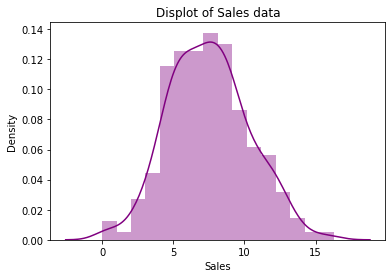

In [16]:
sns.distplot(df.Sales,kde=True,color='purple')
plt.title('Displot of Sales data');

<font color='purple'><b>As the Sales data is normally distributed and the question is to find the attributes that cause high sale let's consider sales values below the mean value 7.5 as Low and above 7.5 as High.</b></font>

In [17]:
df['Sales_labels'] = pd.cut(x=df['Sales'], bins=[0,7.5,16.27], labels=['Low','High'],include_lowest=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15,Low


In [18]:
df.Sales_labels.value_counts()

Low     202
High    198
Name: Sales_labels, dtype: int64

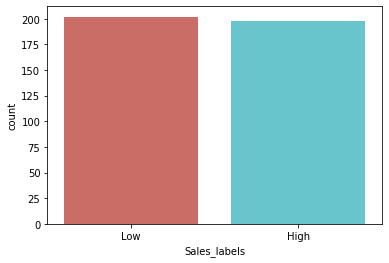

In [19]:
sns.countplot(x='Sales_labels',data=df, palette='hls');

### <font color='maroon'><b>Encode Categorical variables :</b></font>

In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
ordn = OrdinalEncoder(categories=[['Bad','Medium','Good']])

In [22]:
df_enc = df.copy()
df_enc['ShelveLoc'] = ordn.fit_transform(df.loc[:,['ShelveLoc']])

df_enc.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0.0,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,2.0,65,10,Yes,Yes,11.22,High
2,113,35,10,269,80,1.0,59,12,Yes,Yes,10.06,High
3,117,100,4,466,97,1.0,55,14,Yes,Yes,7.40,Low
4,141,64,3,340,128,0.0,38,13,Yes,No,4.15,Low


In [23]:
df_enc.dtypes

CompPrice          int64
Income             int64
Advertising        int64
Population         int64
Price              int64
ShelveLoc        float64
Age                int64
Education          int64
Urban             object
US                object
Sales            float64
Sales_labels    category
dtype: object

In [24]:
df_enc['ShelveLoc'] = df_enc['ShelveLoc'].astype(int)

In [25]:
df_enc.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0,42,17,Yes,Yes,9.50,High
1,111,48,16,260,83,2,65,10,Yes,Yes,11.22,High


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

categ = ['Urban','US']
df_enc[categ] = df[categ].apply(le.fit_transform)
df_enc.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_labels
0,138,73,11,276,120,0,42,17,1,1,9.50,High
1,111,48,16,260,83,2,65,10,1,1,11.22,High
2,113,35,10,269,80,1,59,12,1,1,10.06,High
3,117,100,4,466,97,1,55,14,1,1,7.40,Low
4,141,64,3,340,128,0,38,13,1,0,4.15,Low


In [28]:
df_enc.shape

(400, 12)

### <font color='maroon'><b>Split into independent and dependent variables :</b></font>

In [29]:
X = df_enc.iloc[:,:10]
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [30]:
y = df_enc['Sales_labels']

### <font color='maroon'><b>Feature Scaling :</b></font>

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
x = scaler.fit_transform(X)
x

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

### <font color='maroon'><b>Train Test Split :</b></font>

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [36]:
y_train.value_counts()

Low     167
High    153
Name: Sales_labels, dtype: int64

In [37]:
y_test.value_counts()

High    45
Low     35
Name: Sales_labels, dtype: int64

## <font color='orange'><b>Random Forest Classifier :</b></font>

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
train_pred1 = rf.predict(X_train)
test_pred1 = rf.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_train,train_pred1)

1.0

In [69]:
accuracy_score(y_test,test_pred1)

0.85

<font color='orange'>The model is slightly overfitting.

### <font color='maroon'><b> Grid Search CV</font>

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
# Number of features to consider at every split
max_features = [6,None]
# Maximum number of levels in tree
max_depth =[2,3,4]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4]
# Maximum number of samples to be taken
max_samples = [0.5,0.75,1.0]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [72]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_samples' : max_samples,
              'bootstrap' : bootstrap}

In [73]:
rf_grid = GridSearchCV(rf, param_grid=param_grid)      # kfold cv where k=10

In [74]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'max_features': [6, None],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [75]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 6,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 90}

In [76]:
rf_grid.best_score_

0.83125

In [77]:
rf2 = RandomForestClassifier(n_estimators=30,
                             max_features=6,
                             max_depth=4,
                             max_samples=0.5, 
                             min_samples_leaf=2, 
                             min_samples_split=3,
                             bootstrap=True,
                             random_state=0,
                             oob_score=True)

In [78]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=6, max_samples=0.5,
                       min_samples_leaf=2, min_samples_split=3, n_estimators=30,
                       oob_score=True, random_state=0)

In [79]:
train_pred = rf2.predict(X_train)
test_pred = rf2.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_train,train_pred)

0.9

In [82]:
rf2.oob_score_

0.80625

In [83]:
accuracy_score(y_test,test_pred)

0.8125

<font color='orange'><b>Since the difference between training data accuracy and test data accuracy is within  +/- 10% the model is not over-fitting.

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

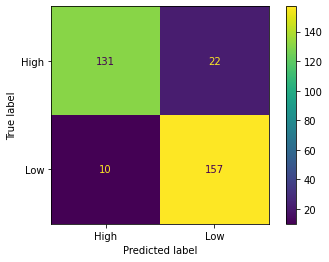

In [85]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred,display_labels=y.unique())
plt.grid(False);

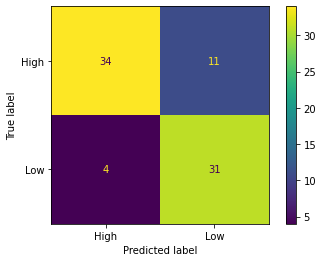

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred,display_labels=y.unique())
plt.grid(False);

### <font color='green'><b>Plot Tree :

In [87]:
from sklearn.tree import plot_tree

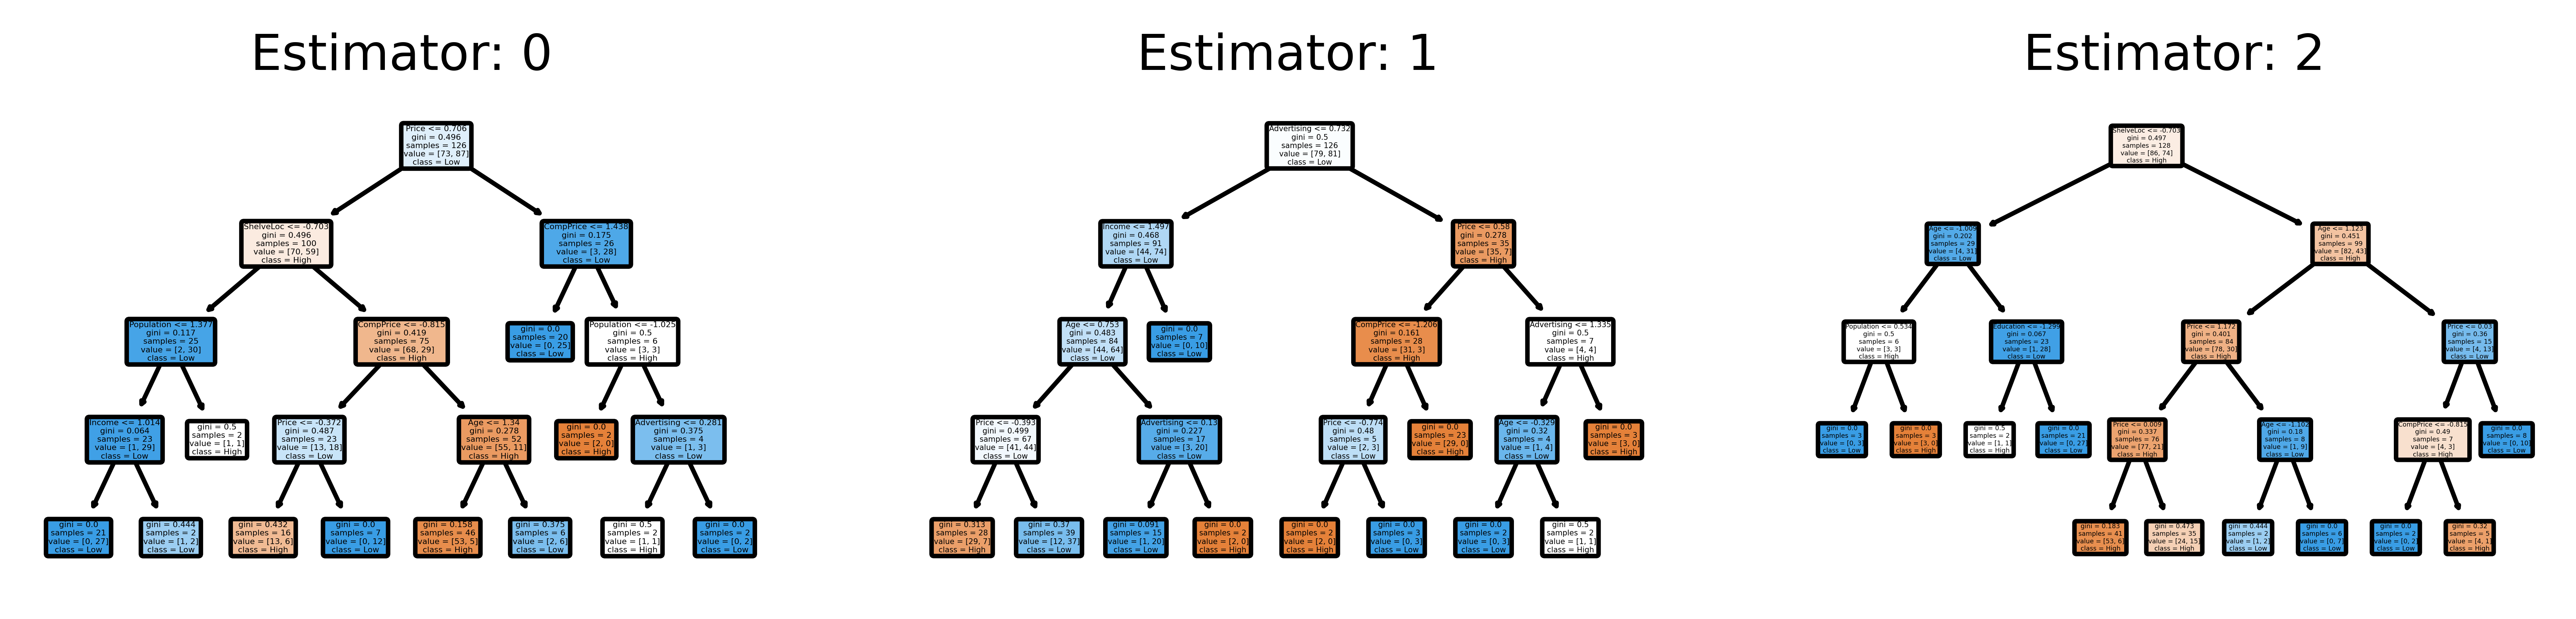

In [88]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    plot_tree(rf2.estimators_[index],
                   feature_names = X.columns, 
                   class_names=y.unique(),
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

#### <font color='violet'><b>With further tuning :

In [89]:
rf3 = RandomForestClassifier(n_estimators=30,max_features=6,max_depth=3, min_samples_leaf=2, min_samples_split=3, random_state=0,oob_score=True)

In [90]:
rf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=6, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=30, oob_score=True,
                       random_state=0)

In [91]:
train_pred2 = rf3.predict(X_train)
test_pred2 = rf3.predict(x_test)

In [92]:
accuracy_score(y_train,train_pred2)

0.865625

In [93]:
accuracy_score(y_test,test_pred2)

0.8

<font color='orange'>Now the training and test data accuracy are more identical.

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

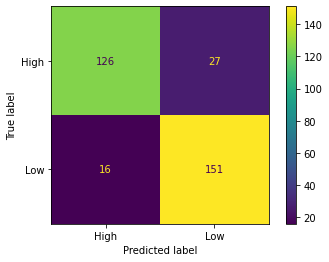

In [95]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred2,display_labels=y.unique())
plt.grid(False);

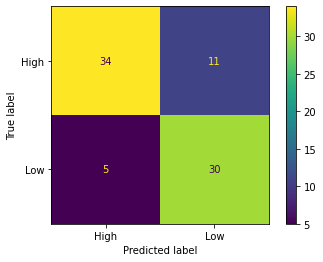

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred2,display_labels=y.unique())
plt.grid(False);

### <font color='green'><b>Plot Tree :

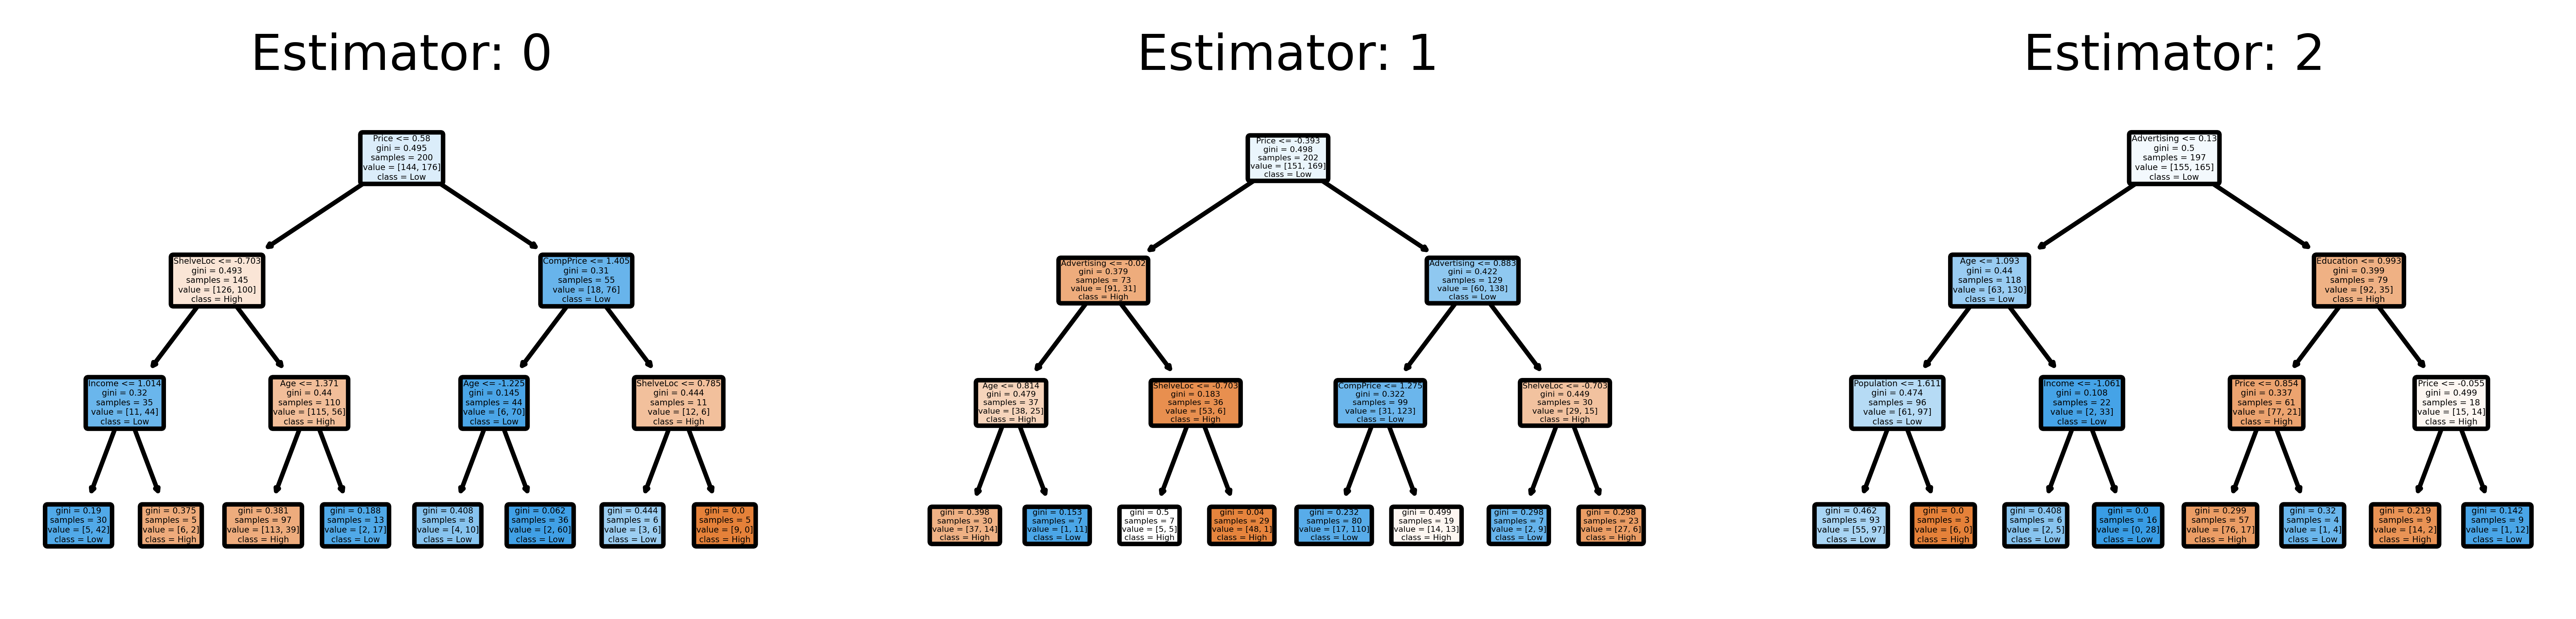

In [97]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    plot_tree(rf3.estimators_[index],
                   feature_names = X.columns, 
                   class_names=y.unique(),
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

### <font color='hotpink'><b>Feature Importance :

In [98]:
rf.feature_importances_

array([0.11244758, 0.09482426, 0.10634845, 0.08169876, 0.26336423,
       0.12988365, 0.12587202, 0.0536067 , 0.01649151, 0.01546284])

In [99]:
df_imp_fea = pd.DataFrame({'Feature':X.columns,'Importance':rf.feature_importances_})

In [100]:
df_imp_fea

,Feature,Importance
0,CompPrice,0.112448
1,Income,0.094824
2,Advertising,0.106348
3,Population,0.081699
4,Price,0.263364
5,ShelveLoc,0.129884
6,Age,0.125872
7,Education,0.053607
8,Urban,0.016492
9,US,0.015463


In [101]:
df_imp_fea_sorted = df_imp_fea.sort_values('Importance',ascending=False).reset_index(drop=True)
df_imp_fea_sorted

,Feature,Importance
0,Price,0.263364
1,ShelveLoc,0.129884
2,Age,0.125872
3,CompPrice,0.112448
4,Advertising,0.106348
5,Income,0.094824
6,Population,0.081699
7,Education,0.053607
8,Urban,0.016492
9,US,0.015463


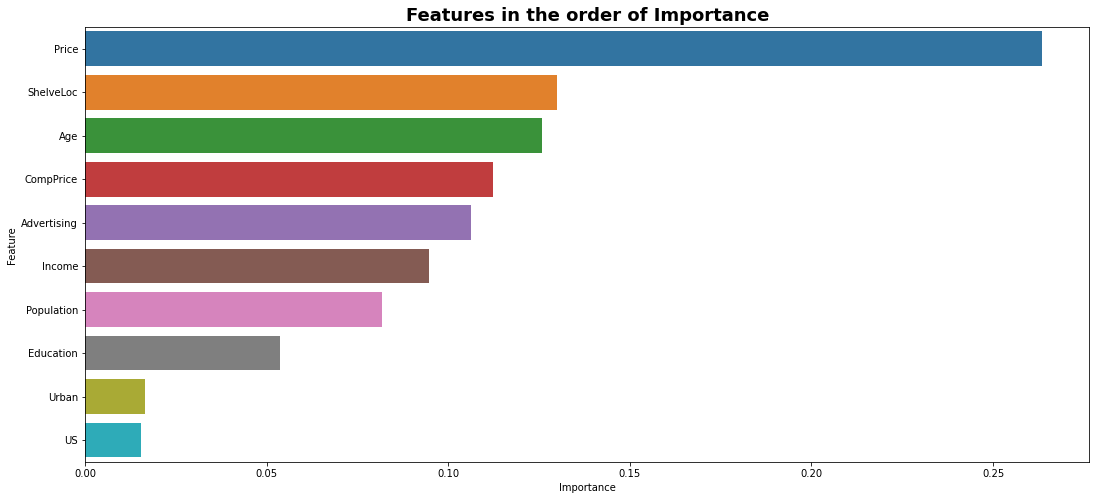

In [102]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'Importance', y = 'Feature', data=df_imp_fea_sorted)
plt.title('Features in the order of Importance',  fontsize = 18, fontweight = 'bold');